<a href="https://colab.research.google.com/github/Sachithananthan-1/Customer_Churn_Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [2]:
#Load the data and display first five rows

churn_data = pd.read_csv('/content/customer_churn_large_dataset.csv')
churn_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [3]:
churn_data.shape

(100000, 9)

In [4]:
#Checking the value names
churn_data.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [5]:
# Check the descriptive statistics of numeric variables
churn_data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [6]:
# Checking the data types of all the columns
churn_data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

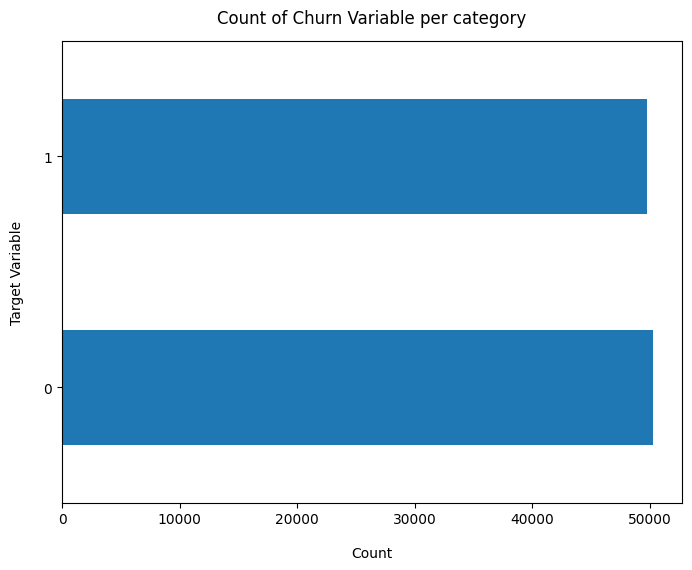

In [7]:
churn_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Churn Variable per category", y=1.02);

## Data Cleaning

In [8]:
churn_data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [9]:
churn_data['Gender'].value_counts()


Female    50216
Male      49784
Name: Gender, dtype: int64

In [10]:
#Replace the Gender values of Male to 1 and Female to 0

churn_data.replace({'Gender':{'Male':1,'Female':0}},inplace=True)

In [11]:
churn_data['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [12]:
# Chicago = 1, Houston = 2, Los Angeles = 3, Miami = 4, New York = 5
churn_data.replace({'Location':{'Chicago' : 1, 'Houston' : 2, 'Los Angeles' : 3, 'Miami' : 4, 'New York' : 5}},inplace=True)

In [13]:
churn_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,1,3,17,73.36,236,0
1,2,Customer_2,62,0,5,1,48.76,172,0
2,3,Customer_3,24,0,3,5,85.47,460,0
3,4,Customer_4,36,0,4,3,97.94,297,1
4,5,Customer_5,46,0,4,19,58.14,266,0


## Data Exploration

<Axes: xlabel='Gender', ylabel='count'>

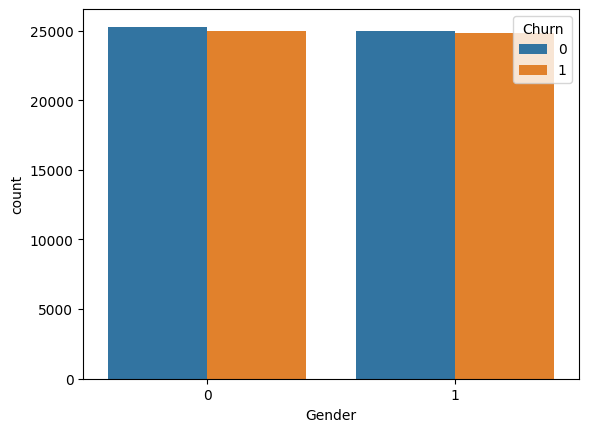

In [14]:
# Gender column
sns.countplot(x='Gender',hue='Churn',data=churn_data)

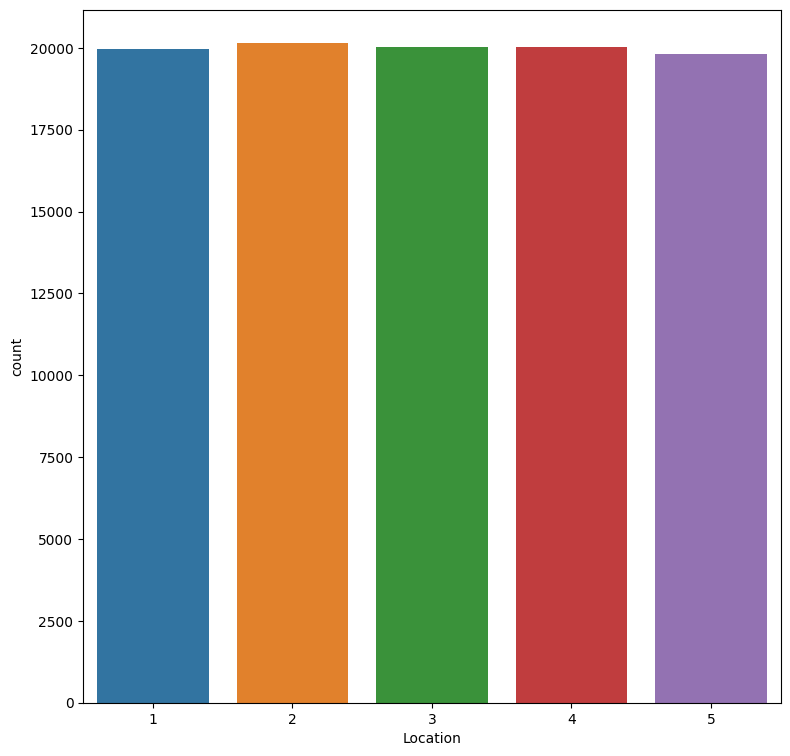

In [15]:
# Location column
plt.figure(figsize=(9,9))
sns.countplot(x='Location', data=churn_data)
plt.show()

<Axes: xlabel='Location', ylabel='count'>

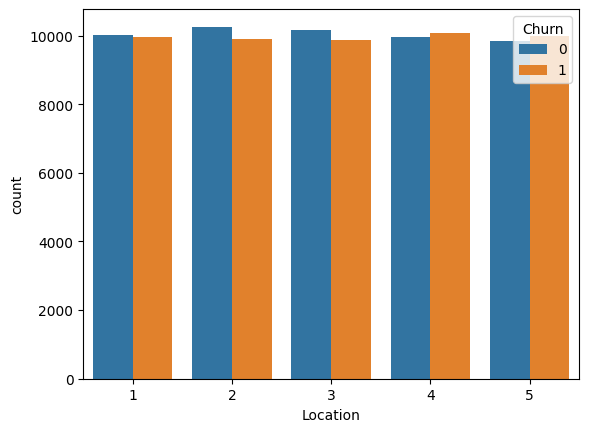

In [16]:
sns.countplot(x='Location',hue='Churn',data=churn_data)

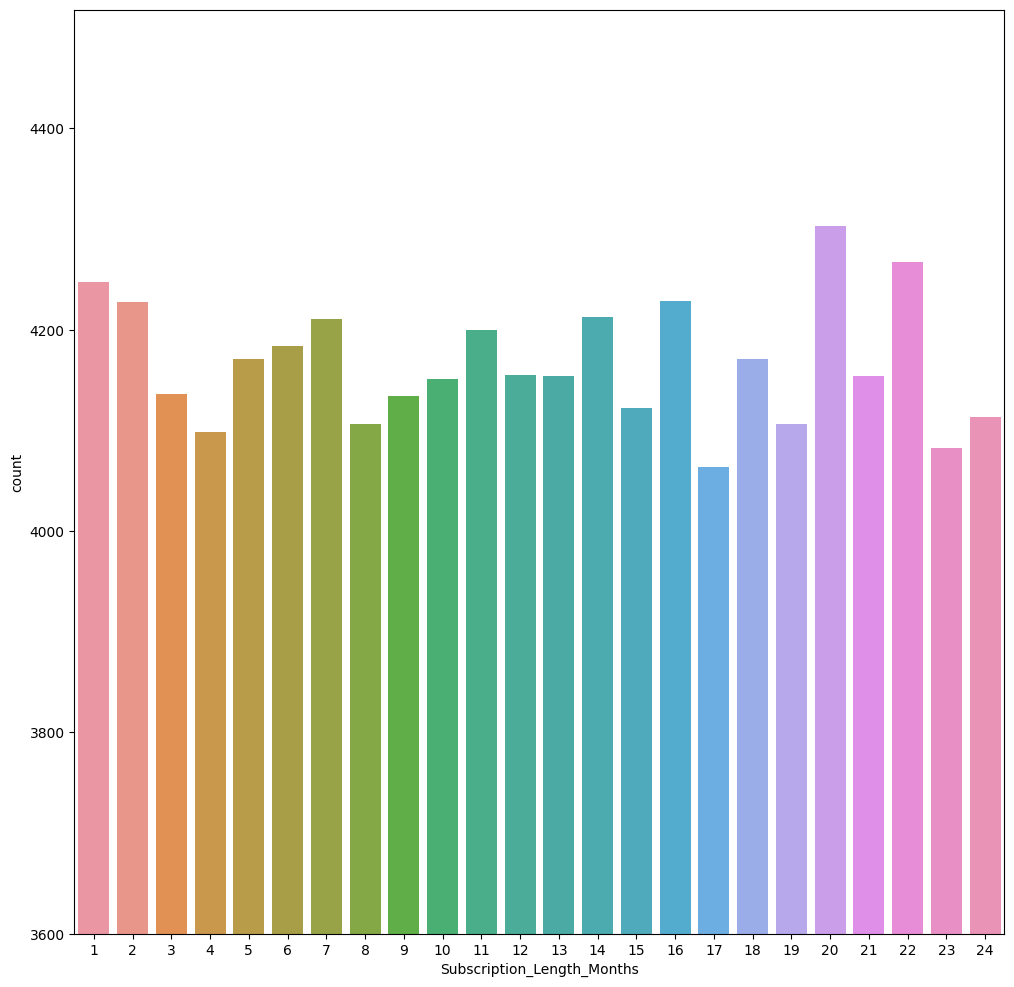

In [17]:
# Subscription column
plt.figure(figsize=(12,12))
sns.countplot(x='Subscription_Length_Months', data=churn_data)
plt.ylim(3600, plt.ylim()[1])
plt.show()

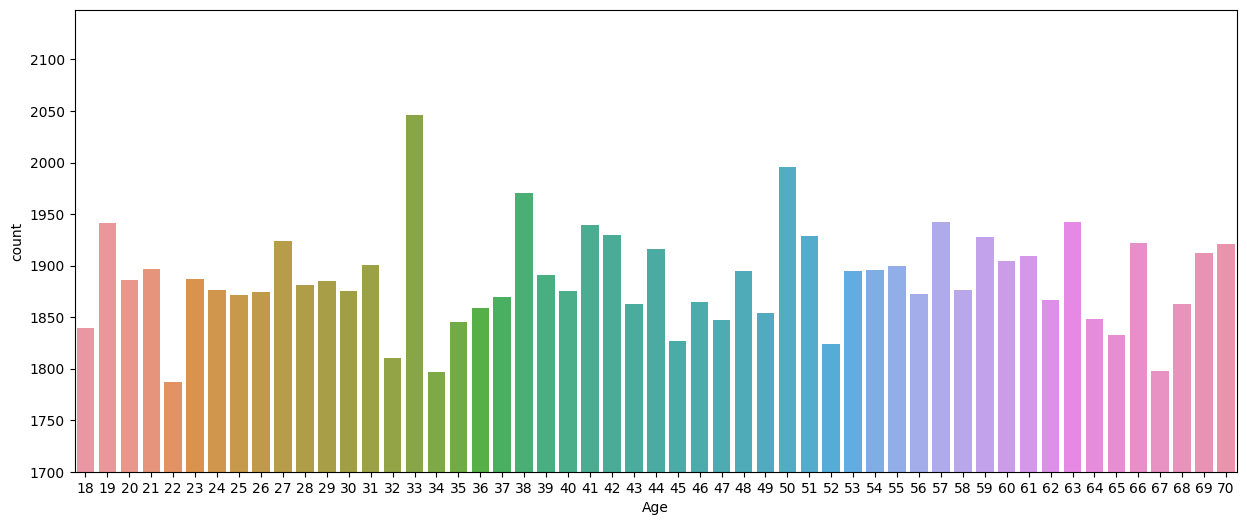

In [18]:
# Age column
plt.figure(figsize=(15,6))
sns.countplot(x='Age', data=churn_data)
plt.ylim(1700, plt.ylim()[1])
plt.show()

<ipython-input-19-0e6500d58968>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data['Monthly_Bill'])


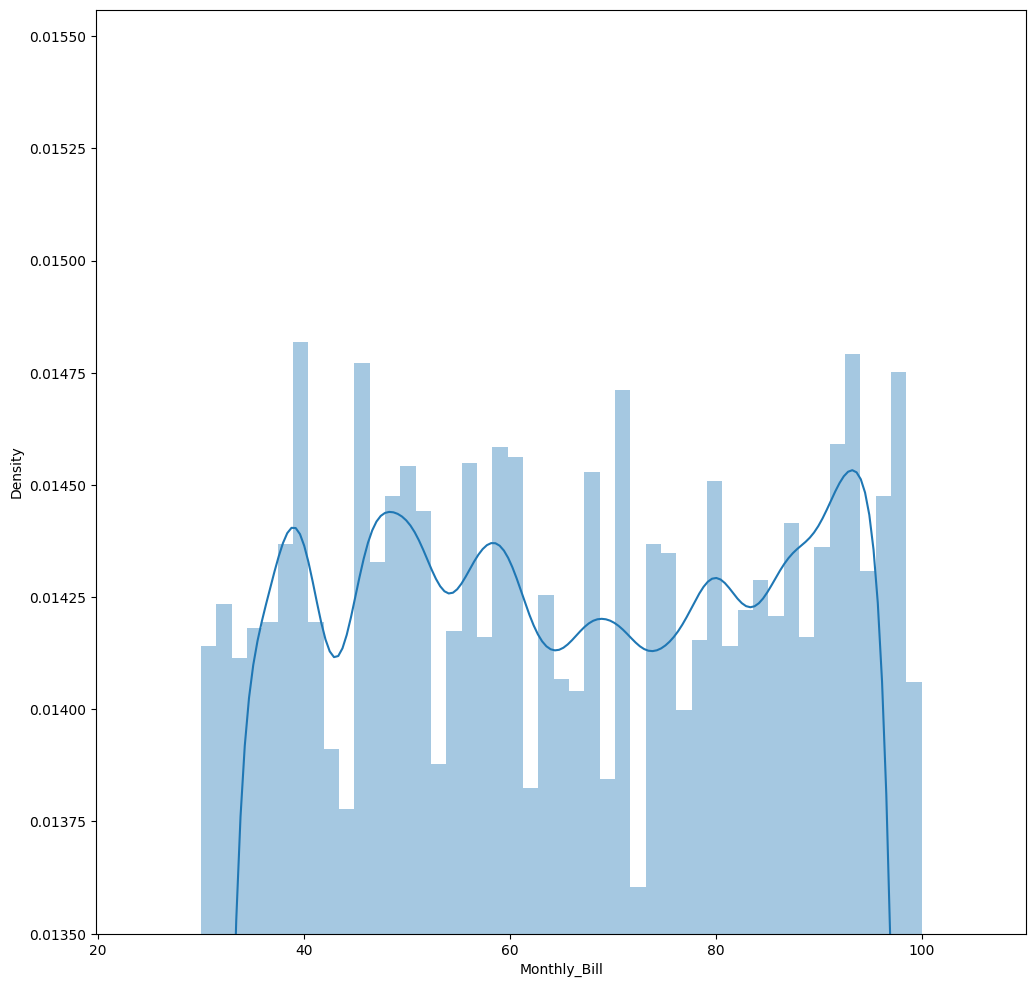

In [19]:

# Monthly_Bill distribution
plt.figure(figsize=(12,12))
sns.distplot(churn_data['Monthly_Bill'])
plt.ylim(0.0135, plt.ylim()[1])
plt.show()


<ipython-input-20-cf0b3191b65d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data['Total_Usage_GB'])


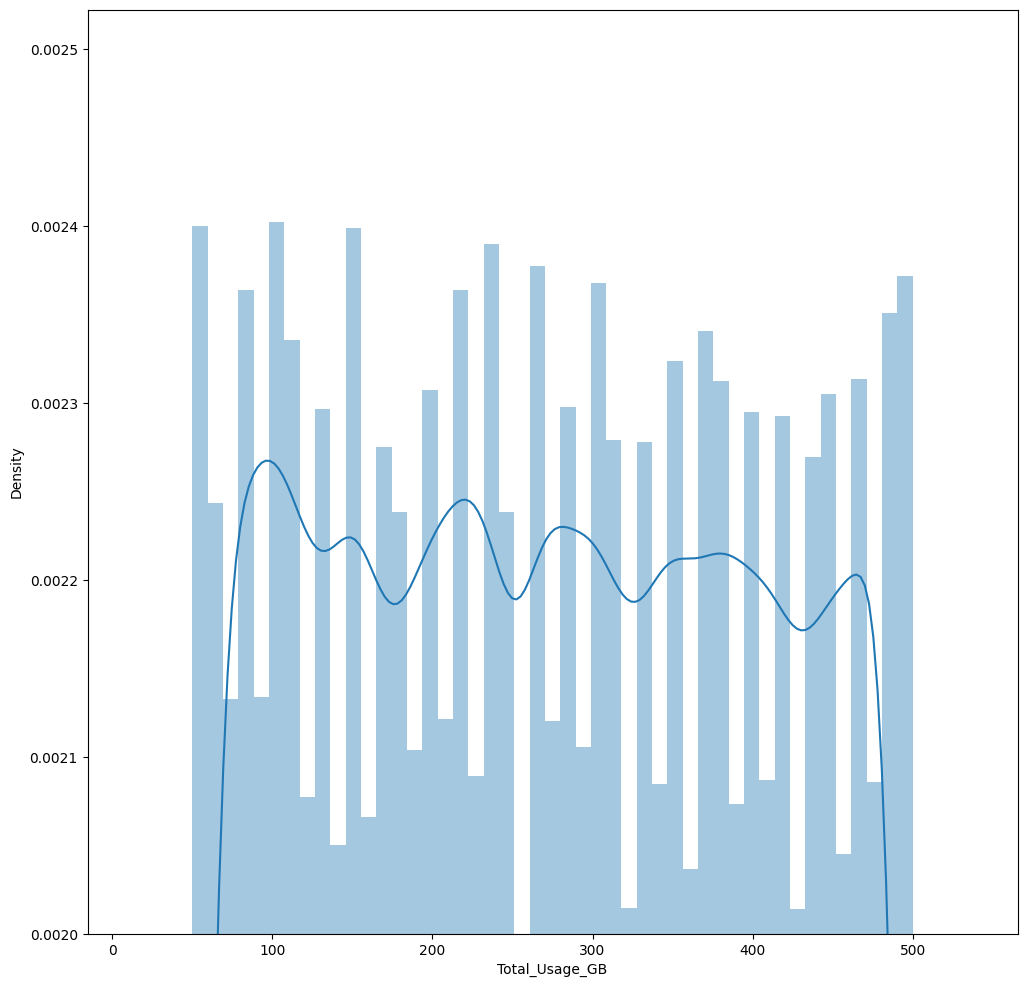

In [20]:
# Total_Usage_GB distribution
plt.figure(figsize=(12,12))
sns.distplot(churn_data['Total_Usage_GB'])
plt.ylim(0.0020, plt.ylim()[1])
plt.show()


<ipython-input-21-a2e855d6f05d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data['Subscription_Length_Months'])


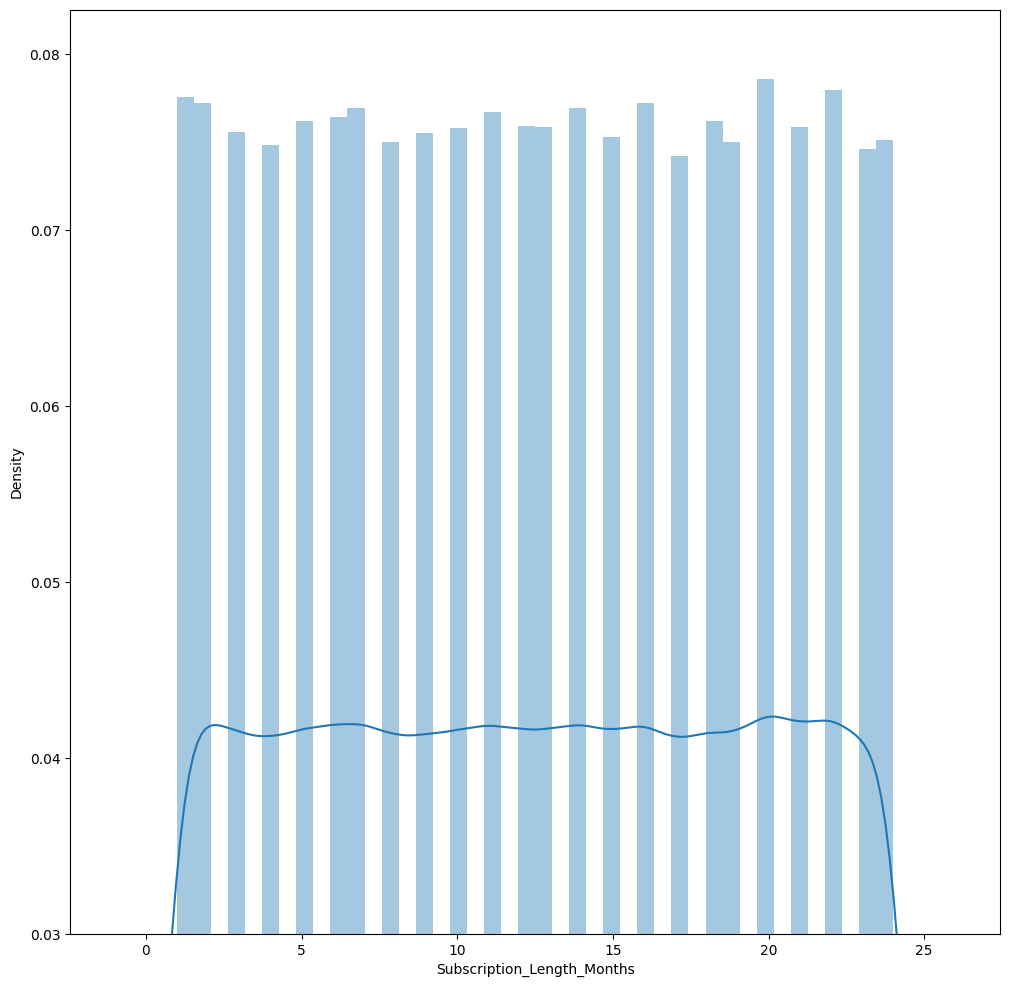

In [21]:
# Subscription_Length_Months distribution
plt.figure(figsize=(12,12))
sns.distplot(churn_data['Subscription_Length_Months'])
plt.ylim(0.03, plt.ylim()[1])
plt.show()

<ipython-input-22-60a5fe2f46a4>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(churn_data.Monthly_Bill[(churn_data["Churn"] == 0) ],
<ipython-input-22-60a5fe2f46a4>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(churn_data.Monthly_Bill[(churn_data["Churn"] == 1) ],


(0.013, 0.015357361625799324)

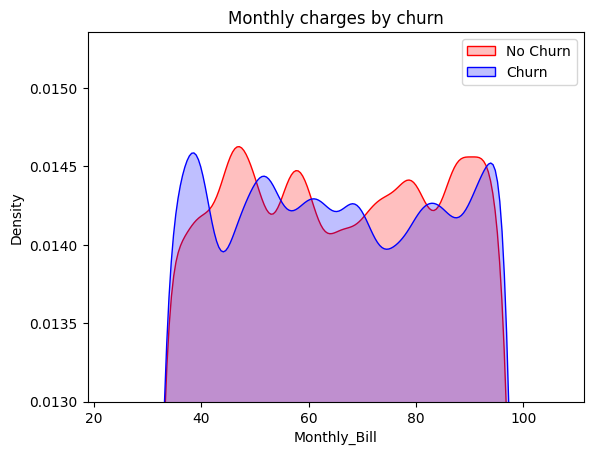

In [22]:
Mth = sns.kdeplot(churn_data.Monthly_Bill[(churn_data["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(churn_data.Monthly_Bill[(churn_data["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly_Bill')
Mth.set_title('Monthly charges by churn')
plt.ylim(0.013, plt.ylim()[1])

<ipython-input-23-be6a24c0ac58>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(churn_data.Total_Usage_GB[(churn_data["Churn"] == 0) ],
<ipython-input-23-be6a24c0ac58>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(churn_data.Total_Usage_GB[(churn_data["Churn"] == 1) ],


(0.0016, 0.0023863691266569056)

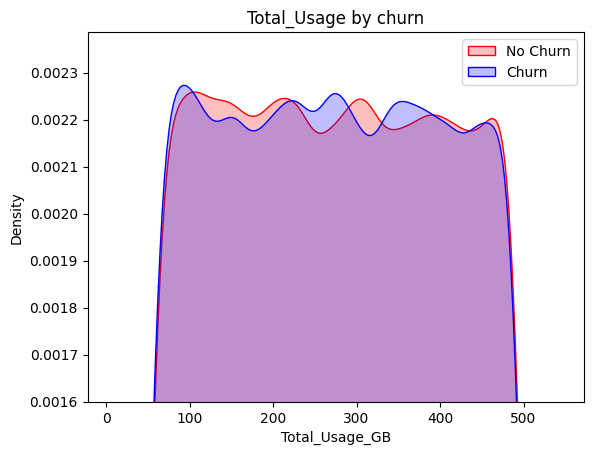

In [23]:
Mth = sns.kdeplot(churn_data.Total_Usage_GB[(churn_data["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(churn_data.Total_Usage_GB[(churn_data["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total_Usage_GB')
Mth.set_title('Total_Usage by churn')
plt.ylim(0.0016, plt.ylim()[1])

# Model Building

In [24]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


In [30]:
X = churn_data.drop(columns =['Name','Churn'], axis = 1)
y = churn_data['Churn']

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
x = scaler.fit_transform(X)

In [33]:
#Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.2, random_state = 7,stratify=y)

In [34]:
# KNN Classifier
# Initialize and train a K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)

# Make predictions using the KNN classifier
knn_predictions = knn_classifier.predict(X_test)

# Calculate the accuracy of the KNN classifier
knn_accuracy = accuracy_score(Y_test, knn_predictions)
print("KNN Classifier Accuracy:", knn_accuracy)



# Decision Tree Classifier
# Initialize and train a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, Y_train)

# Make predictions using the Decision Tree classifier
decision_tree_predictions = decision_tree_classifier.predict(X_test)

# Calculate the accuracy of the Decision Tree classifier
decision_tree_accuracy = accuracy_score(Y_test, decision_tree_predictions)
print("Decision Tree Classifier Accuracy:", decision_tree_accuracy)



# Random Forest Classifier
# Initialize and train a Random Forest classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, Y_train)

# Make predictions using the Random Forest classifier
random_forest_predictions = random_forest_classifier.predict(X_test)

# Calculate the accuracy of the Random Forest classifier
random_forest_accuracy = accuracy_score(Y_test, random_forest_predictions)
print("Random Forest Classifier Accuracy:", random_forest_accuracy)




#  Gradient Boosting classifier
# Initialize and train a Gradient Boosting classifier
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(X_train, Y_train)

# Make predictions using the Gradient Boosting classifier
gradient_boosting_predictions = gradient_boosting_classifier.predict(X_test)

# Calculate the accuracy of the Gradient Boosting classifier
gradient_boosting_accuracy = accuracy_score(Y_test, gradient_boosting_predictions)
print("Gradient Boosting Classifier Accuracy:", gradient_boosting_accuracy)



# Gaussian Naive Bayes classifier
# Initialize and train a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)

# Make predictions using the Gaussian Naive Bayes classifier
naive_bayes_predictions = naive_bayes_classifier.predict(X_test)

# Calculate the accuracy of the Gaussian Naive Bayes classifier
naive_bayes_accuracy = accuracy_score(Y_test, naive_bayes_predictions)
print("Gaussian Naive Bayes Classifier Accuracy:", naive_bayes_accuracy)



# Logistic Regression classifier
# Initialize and train a Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train, Y_train)

# Make predictions using the Logistic Regression classifier
logistic_regression_predictions = logistic_regression_classifier.predict(X_test)

# Calculate the accuracy of the Logistic Regression classifier
logistic_regression_accuracy = accuracy_score(Y_test, logistic_regression_predictions)
print("Logistic Regression Classifier Accuracy:", logistic_regression_accuracy)



# Multi-layer Perceptron classifier
# Initialize and train a Multi-layer Perceptron (MLP) classifier
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train, Y_train)

# Make predictions using the MLP classifier
mlp_predictions = mlp_classifier.predict(X_test)

# Calculate the accuracy of the MLP classifier
mlp_accuracy = accuracy_score(Y_test, mlp_predictions)
print("MLP Classifier Accuracy:", mlp_accuracy)

KNN Classifier Accuracy: 0.5017
Decision Tree Classifier Accuracy: 0.49745
Random Forest Classifier Accuracy: 0.5004
Gradient Boosting Classifier Accuracy: 0.50145
Gaussian Naive Bayes Classifier Accuracy: 0.50295
Logistic Regression Classifier Accuracy: 0.4997
MLP Classifier Accuracy: 0.5002


Since the accuracy is low, try with hyperparameter tuning

In [37]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load your dataset, assuming it's stored in a DataFrame called 'df'

# Define features and target variable
X = churn_data.drop(columns=['CustomerID', 'Name', 'Churn'])
y = churn_data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# Define preprocessing steps for numerical and categorical features
numeric_features = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Gender', 'Location']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define classifiers and their respective hyperparameters
classifiers = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, 30]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}


# Iterate over classifiers, perform hyperparameter tuning, and evaluate
for clf_name, clf_data in classifiers.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', clf_data['model'])])

    # Perform hyperparameter tuning using GridSearchCV
    param_grid = clf_data['params']
    param_name = list(param_grid.keys())[0]
    param_values = param_grid[param_name]

    clf_grid = GridSearchCV(estimator=clf, param_grid={f'classifier__{param_name}': param_values}, cv=3, scoring='accuracy')
    clf_grid.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf_grid.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{clf_name} Classifier Accuracy: {accuracy}')
    print(f'Best Parameters for {clf_name}: {clf_grid.best_params_}')


RandomForest Classifier Accuracy: 0.4985
Best Parameters for RandomForest: {'classifier__n_estimators': 200}
GradientBoosting Classifier Accuracy: 0.5047
Best Parameters for GradientBoosting: {'classifier__n_estimators': 50}


In [38]:
input_data = (2,62,0,5,1,48.76,172)
# changing input value into a numpy array
input_value = np.asarray(input_data)
input_data_reshaped = input_value.reshape(1,-1)
prediction = logistic_regression_classifier.predict(input_data_reshaped)
print(prediction)


if(prediction[0] == '1'):
  print('The client will Churn')
else:
  print('The client will not Churn')


[0]
The client will not Churn
